In [1]:
import pandas as pd
import seaborn as sns

sns.set_palette("Set2")
sns.set_context(
    "notebook",
    font_scale=1.25,
    rc={"figure.dpi": 300, "text.usetex": True, "font.family": "Helvetica"},
)


def load_results(file_name):
    df = pd.read_parquet(file_name)
    df = df.rename(
        columns={
            "average_runtime_s": "Time (s)",
            "compilation_time_s": "Compilation Time (s)",
            "transfer_time_s": "Transfer Time (s)",
            "basis": "Basis Set",
            "device": "Device",
            "structure": "Structure",
            "method": "Method",
        }
    )

    df["Device"] = (
        df["Device"]
        .map(
            {
                "MESS (NVIDIA A100-SXM4-80GB)": "A100",
                "MESS (NVIDIA H100 80GB HBM3)": "H100",
                "MESS (cpu)": "CPU",
            }
        )
        .fillna(df["Device"])
    )

    df["Method"] = df["Method"].map({"hfx": "Hartree-Fock", "pbe": "DFT (PBE)"})
    df["Structure"] = df["Structure"].map(
        {"h2": "$H_2$", "h2o": "$H_2O$", "ch4": "$CH_4$", "c6h6": "$C_6H_6$"}
    )

    def calc_speedup(group):
        ref_mask = group["Device"].str.contains("PySCF")
        group["Speedup"] = group[ref_mask]["Time (s)"].values / group["Time (s)"].values
        return group

    df = df.groupby(["Method", "Structure", "Basis Set"]).apply(calc_speedup)
    df = df.reset_index(drop=True)

    return df[~df["Device"].str.contains("PySCF")]


full_df = pd.concat(
    [
        load_results("results_000.parquet"),
        load_results("results_001.parquet"),
        load_results("results_002.parquet"),
    ]
)
df = full_df[~full_df["Device"].str.contains("CPU")]

/tmp/ipykernel_3440621/2857927677.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["Method", "Structure", "Basis Set"]).apply(calc_speedup)
/tmp/ipykernel_3440621/2857927677.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["Method", "Structure", "Basis Set"]).apply(calc_speedup)
/tmp/ipykernel_3440621/2857927677.py:48: DeprecationWarning: DataFrameGroupBy.apply oper

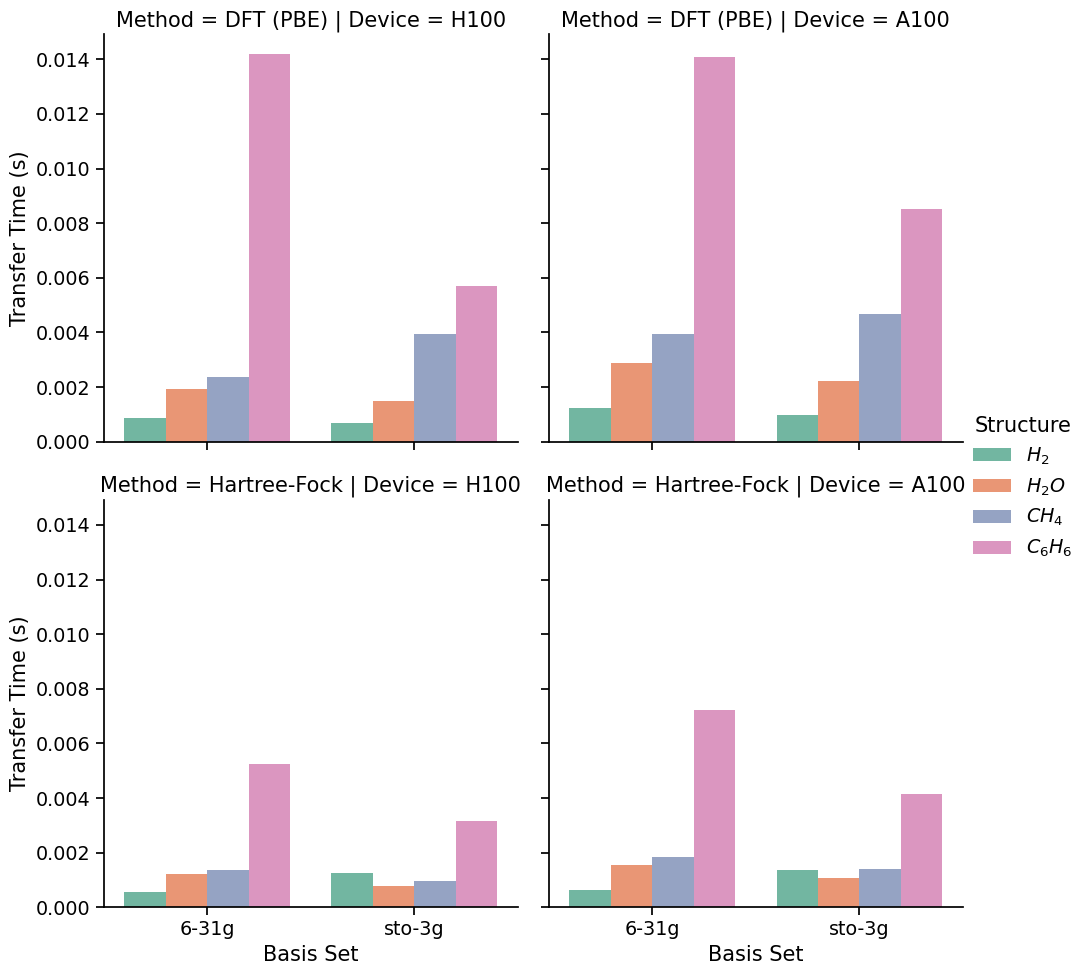

In [2]:
sns.catplot(
    x="Basis Set",
    y="Transfer Time (s)",
    data=df,
    row="Method",
    col="Device",
    hue="Structure",
    kind="bar",
    hue_order=["$H_2$", "$H_2O$", "$CH_4$", "$C_6H_6$"]
)

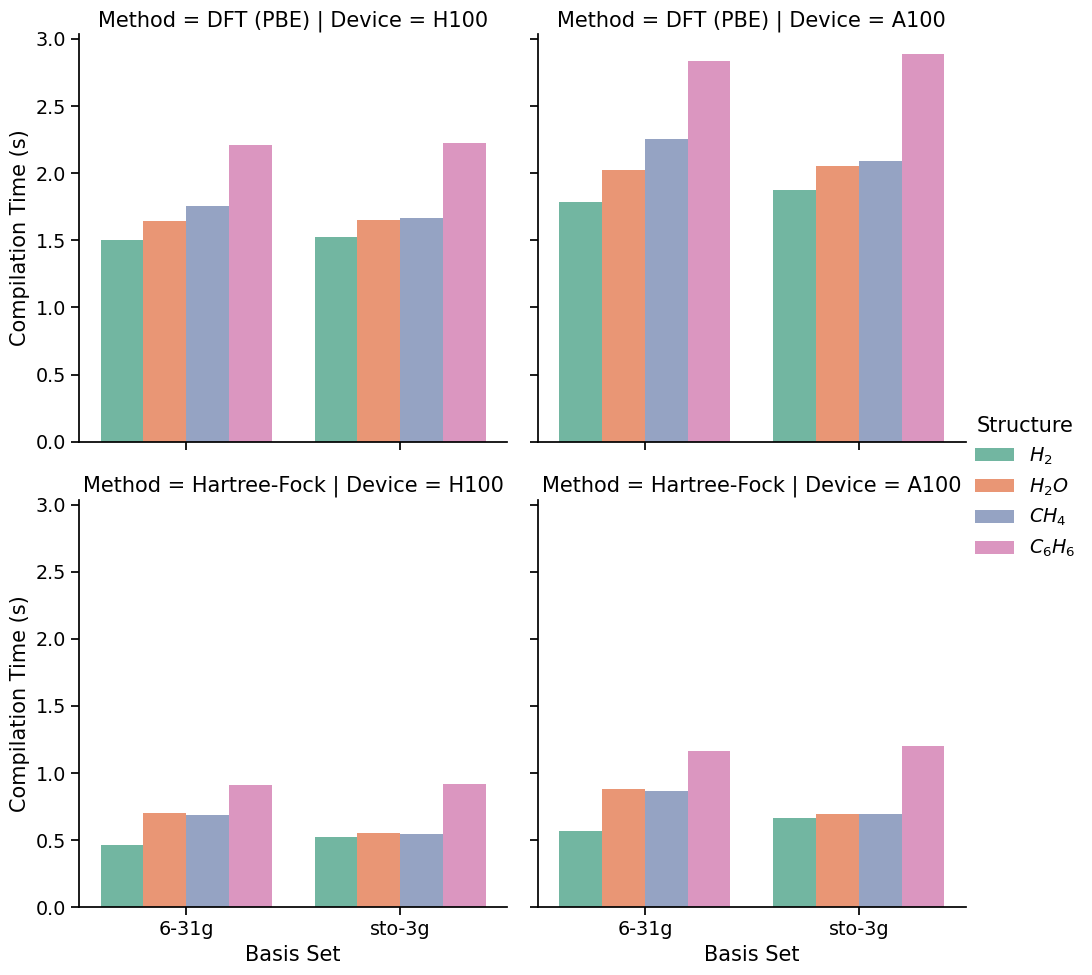

In [3]:
sns.catplot(
    x="Basis Set",
    y="Compilation Time (s)",
    data=df,
    row="Method",
    col="Device",
    hue="Structure",
    kind="bar",
    hue_order=["$H_2$", "$H_2O$", "$CH_4$", "$C_6H_6$"]
)

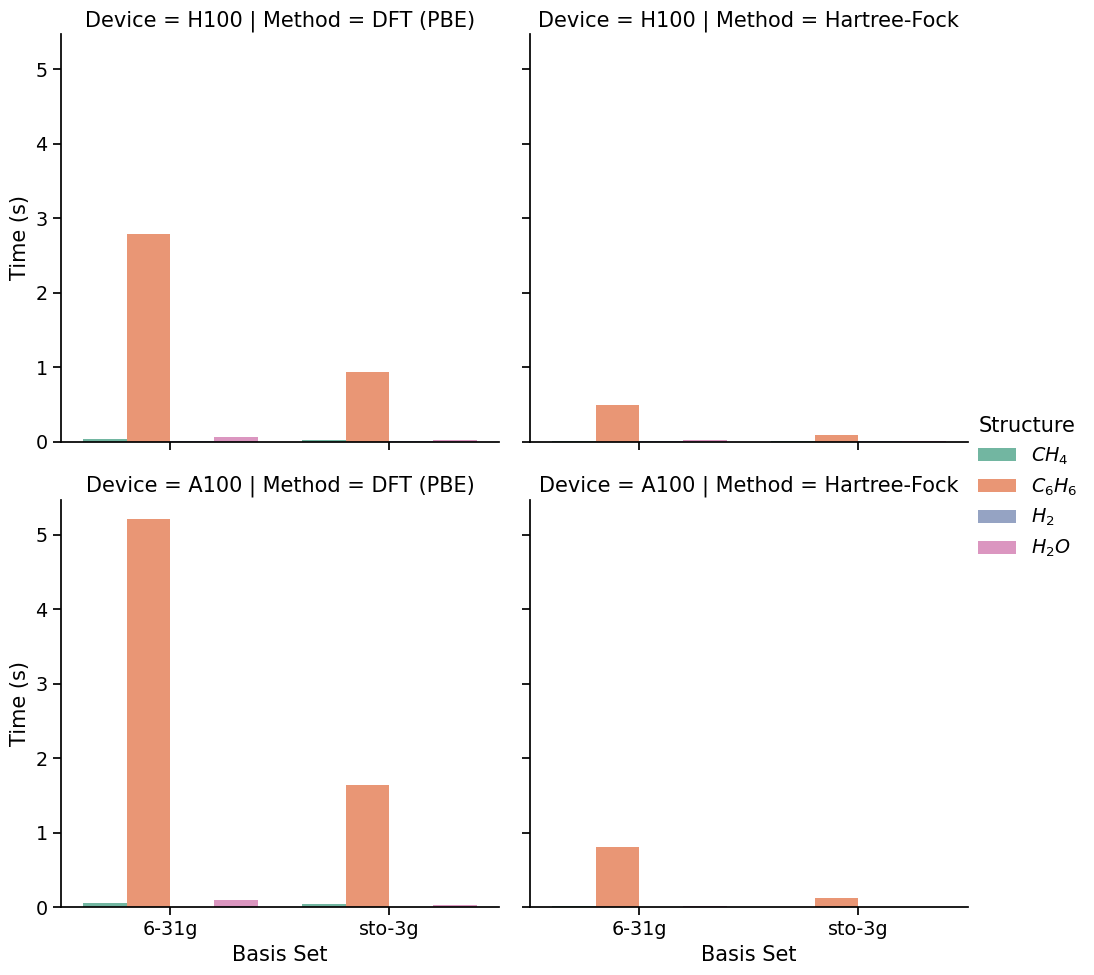

In [4]:
sns.catplot(
    x="Basis Set",
    y="Time (s)",
    data=df,
    col="Method",
    row="Device",
    hue="Structure",
    kind="bar",
)

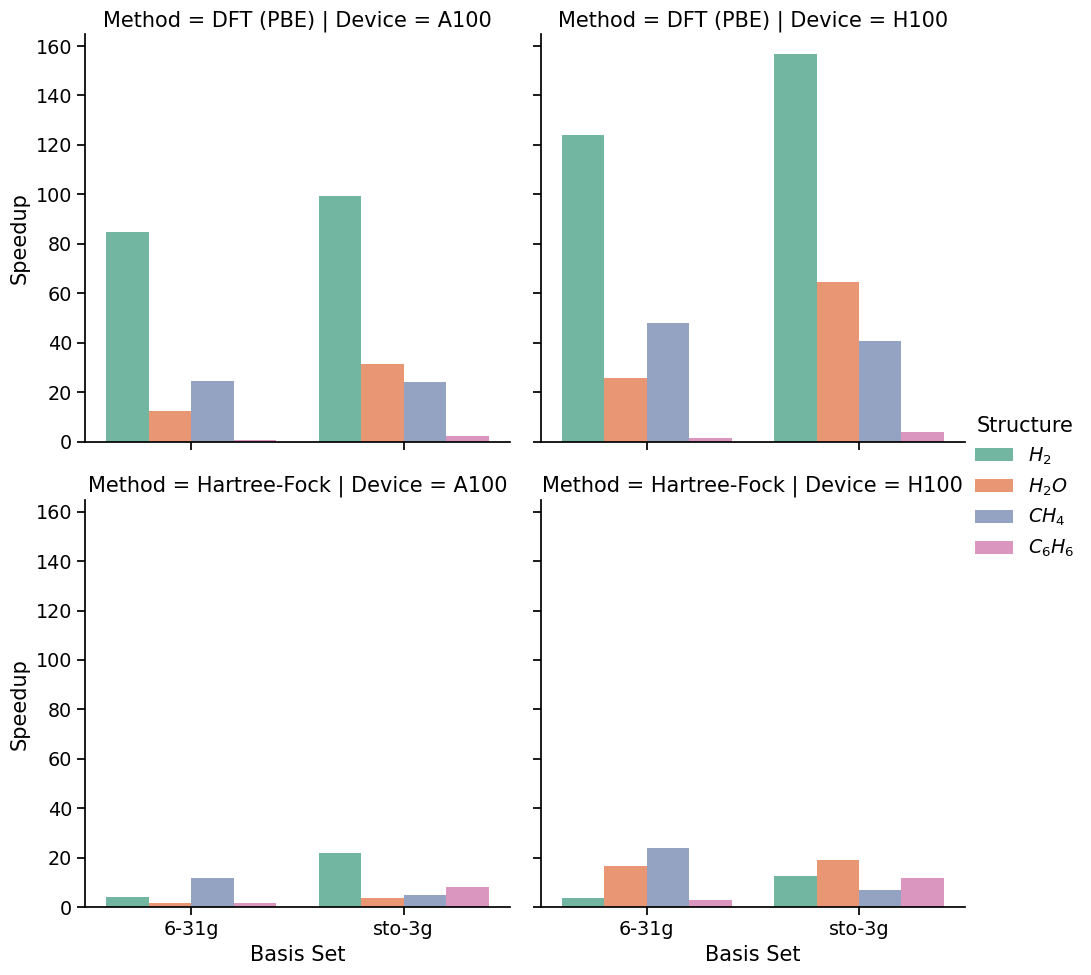

In [5]:
sns.catplot(
    x="Basis Set",
    y="Speedup",
    data=df,
    row="Method",
    col="Device",
    col_order=["A100", "H100"],
    hue="Structure",
    kind="bar",
    hue_order=["$H_2$", "$H_2O$", "$CH_4$", "$C_6H_6$"]
)

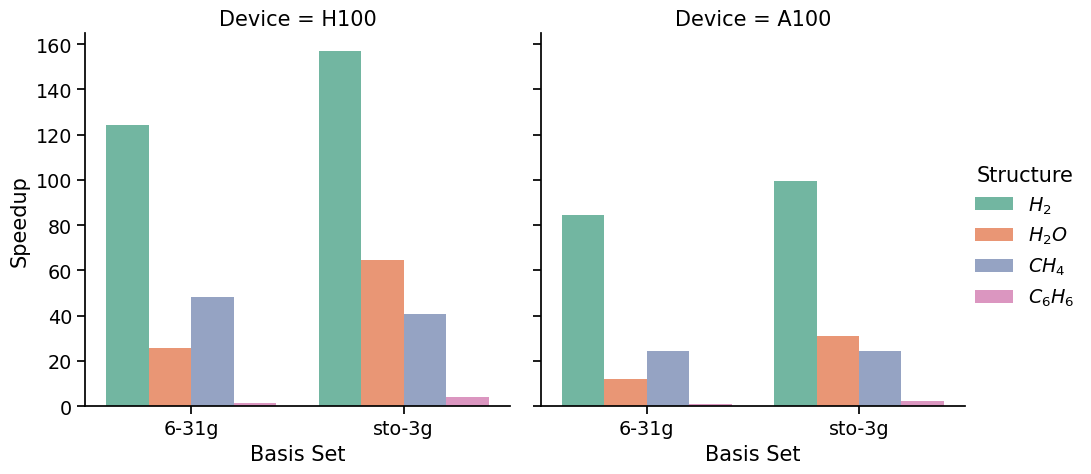

In [6]:
sns.catplot(
    x="Basis Set",
    y="Speedup",
    data=df[df["Method"].str.contains("DFT")],
    # row="Method",
    col="Device",
    hue="Structure",
    kind="bar",
    hue_order=["$H_2$", "$H_2O$", "$CH_4$", "$C_6H_6$"]
)

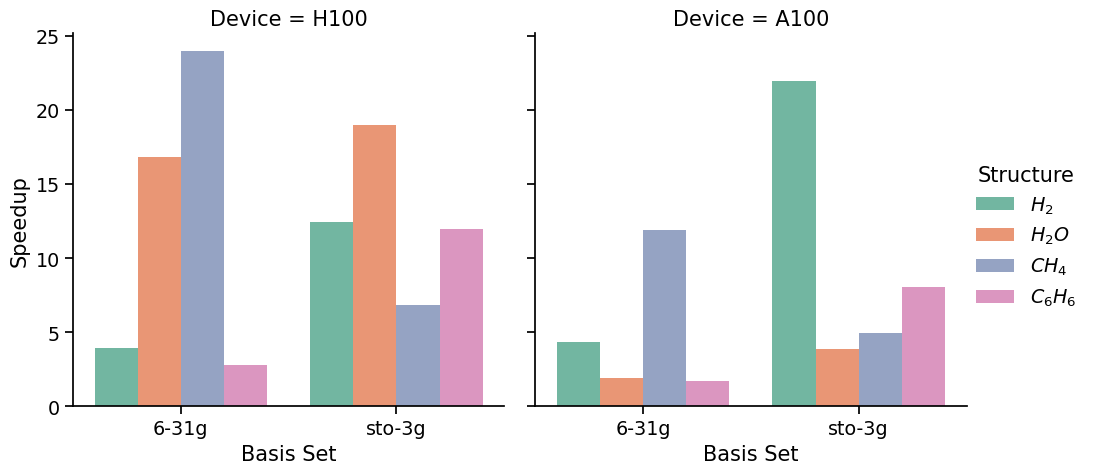

In [7]:
sns.catplot(
    x="Basis Set",
    y="Speedup",
    data=df[~df["Method"].str.contains("DFT")],
    # row="Method",
    col="Device",
    hue="Structure",
    kind="bar",
    hue_order=["$H_2$", "$H_2O$", "$CH_4$", "$C_6H_6$"]
)

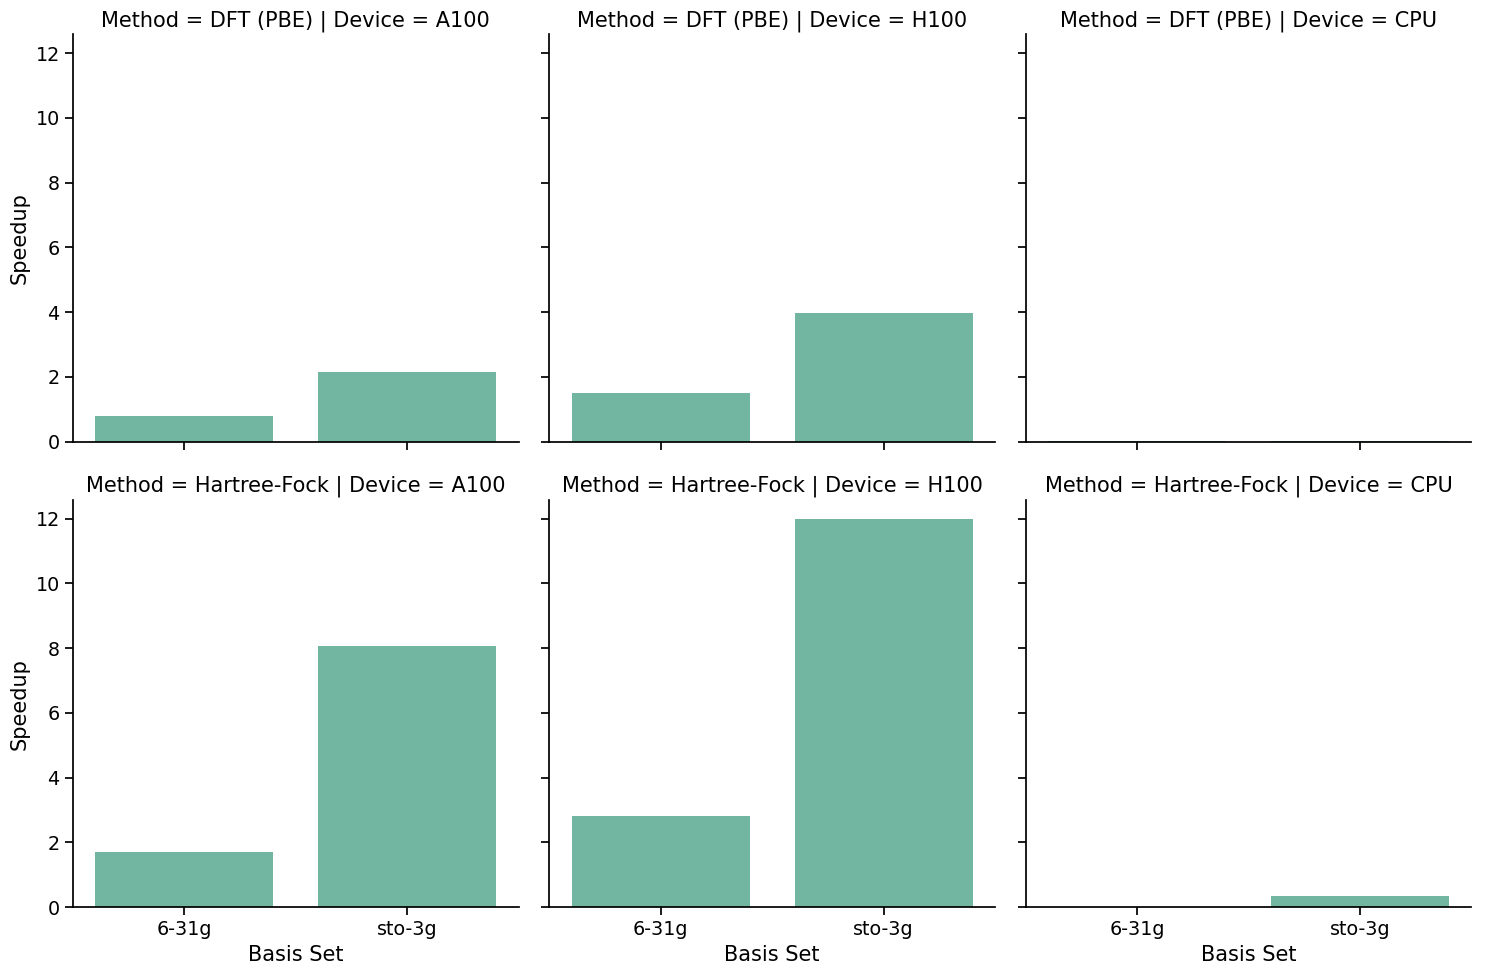

In [8]:
sns.catplot(
    data=full_df[full_df["Structure"].str.contains("C_6H_6")],
    x="Basis Set",
    y="Speedup",
    row="Method",
    col="Device",
    col_order=["A100", "H100", "CPU"],
    kind="bar",
)

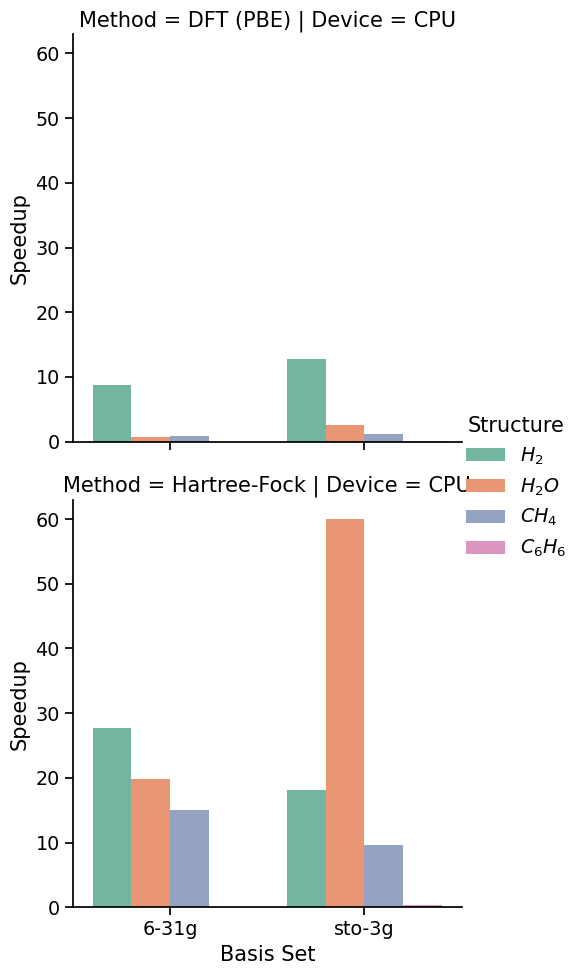

In [9]:
cpu = full_df[full_df["Device"].str.contains("CPU")]
cpu

sns.catplot(
    x="Basis Set",
    y="Speedup",
    data=cpu,
    row="Method",
    col="Device",
    hue="Structure",
    kind="bar",
    hue_order=["$H_2$", "$H_2O$", "$CH_4$", "$C_6H_6$"]
)